In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [4]:
cars = pd.read_csv('ToyotaCorolla - MLR.csv')
cars.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
cars.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

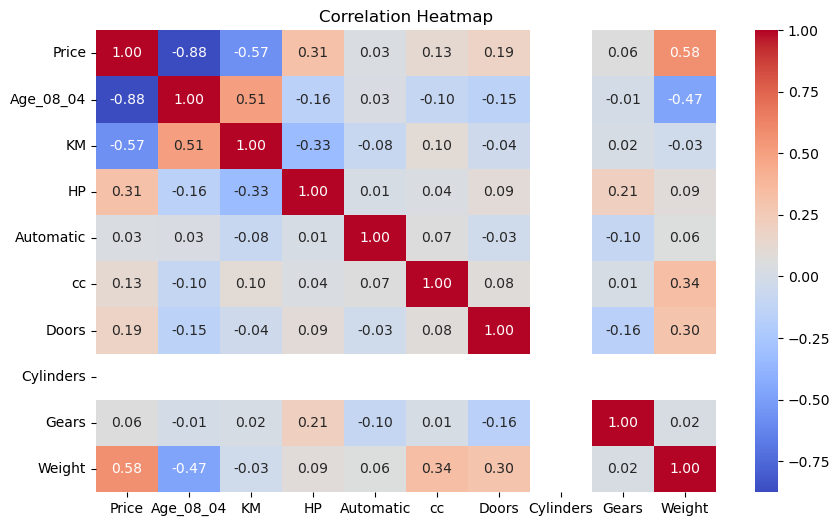

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

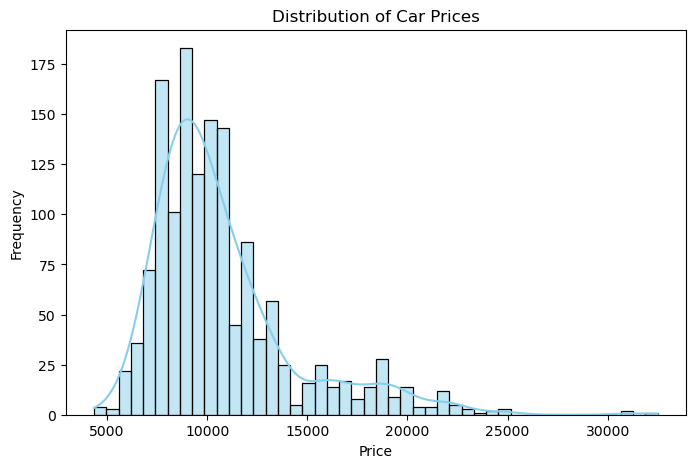

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(cars['Price'], kde=True, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

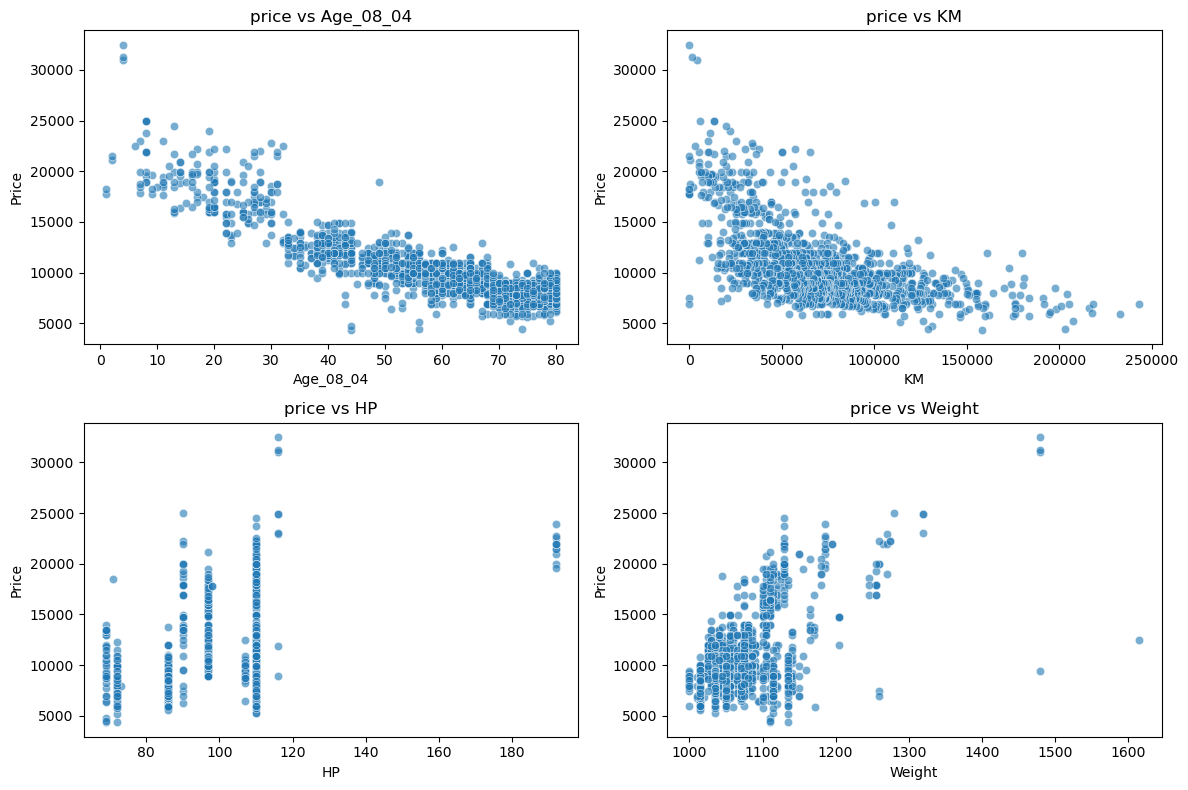

In [10]:
key_vars = ['Age_08_04','KM','HP','Weight']
plt.figure(figsize=(12,8))
for i,var in enumerate(key_vars,1):
    plt.subplot(2,2,i)
    sns.scatterplot(x = cars[var] , y = cars['Price'] , alpha = 0.6)
    plt.title(f'price vs {var}')
plt.tight_layout()
plt.show()

In [11]:
if 'Cylinders' in cars.columns:
    cars = cars.drop(columns=['Cylinders'])

In [12]:
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [13]:
cars = pd.get_dummies(cars,columns=['Fuel_Type'],drop_first=True)

In [14]:
cars.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False


In [15]:
cars[cars['cc']>3000]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,5,1180,False,True


In [16]:
cars.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [17]:
cars.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False


#### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = cars.iloc[:,1:]
y = cars['Price']

In [20]:
x.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,True,False
1,23,72937,90,0,2000,3,5,1165,True,False
2,24,41711,90,0,2000,3,5,1165,True,False
3,26,48000,90,0,2000,3,5,1165,True,False
4,30,38500,90,0,2000,3,5,1170,True,False


In [21]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [28]:
from sklearn.linear_model import LinearRegression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)
print('Model 1 (All features):', model1.score(x_test, y_test))

features2 = ['Age_08_04', 'KM', 'HP', 'Weight']
model2 = LinearRegression()
model2.fit(x_train[features2], y_train)
print('Model 2 (Key features):', model2.score(x_test[features2], y_test))

features3 = ['Age_08_04', 'KM', 'HP', 'Weight', 'Automatic',
             'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
model3 = LinearRegression()
model3.fit(x_train[features3], y_train)
print('Model 3 (Key + categorical):', model3.score(x_test[features3], y_test))


Model 1 (All features): 0.8820851393696498
Model 2 (Key features): 0.8869500768207668
Model 3 (Key + categorical): 0.8844783009415943


#### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [76]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [77]:
def evaluate_reg(y,yhat):
    mse = mean_squared_error(y,yhat)
    rmse = np.sqrt(mse)
    r2_val=r2_score(y,yhat)
    print(f'Mean Squared Error:{np.round(mse,2)}')
    print(f'Root Mean Squared Error:{np.round(rmse,2)}')
    print(f'R-squre Val:{np.round(r2_val,2)}')
    return mse,rmse,r2_val

In [78]:
# Model 1

In [79]:
yhat1 = model1.predict(x_test)

In [80]:
test_mse,test_rmse,test_r2=evaluate_reg(y_test,yhat1)

Mean Squared Error:1807055.62
Root Mean Squared Error:1344.27
R-squre Val:0.88


In [81]:
# Model 2

In [82]:
yhat2 = model2.predict(x_test[features2])
test_mse,test_rmse,test_r2=evaluate_reg(y_test,yhat2)

Mean Squared Error:1732500.02
Root Mean Squared Error:1316.24
R-squre Val:0.89


In [83]:
# Model 3

In [84]:
yhat3 = model3.predict(x_test[features3])
test_mse,test_rmse,test_r2=evaluate_reg(y_test,yhat3)

Mean Squared Error:1770380.21
Root Mean Squared Error:1330.56
R-squre Val:0.88


#### 5.Apply Lasso and Ridge methods on the model.

In [85]:
from sklearn.linear_model import Lasso, Ridge

In [86]:
# Lasso 
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(x_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(x_test)

# Evaluation
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print('LASSO Regression Results:')
print(f"R² = {r2_lasso:.3f}")
print(f"MAE = {mae_lasso:.2f}")
print(f"RMSE = {rmse_lasso:.2f}")
print()


LASSO Regression Results:
R² = 0.882
MAE = 980.45
RMSE = 1344.97



In [87]:
# Ridge
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(x_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(x_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('RIDGE Regression Results:')
print(f"R² = {r2_ridge:.3f}")
print(f"MAE = {mae_ridge:.2f}")
print(f"RMSE = {rmse_ridge:.2f}")
print()


RIDGE Regression Results:
R² = 0.882
MAE = 980.87
RMSE = 1343.77



In [88]:
print(' Model Performance Comparison ')
print(f'LASSO  → R²: {r2_lasso:.3f}, MAE: {mae_lasso:.2f}, RMSE: {rmse_lasso:.2f}')
print(f'RIDGE  → R²: {r2_ridge:.3f}, MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}')


 Model Performance Comparison 
LASSO  → R²: 0.882, MAE: 980.45, RMSE: 1344.97
RIDGE  → R²: 0.882, MAE: 980.87, RMSE: 1343.77


## Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?

##### **Normalization** and **Standardization** are techniques used to scale numerical data before applying machine learning models. **Normalization** rescales data into a fixed range, usually between 0 and 1, using the formula ((x - xmin) / (xmax - xmin)). It’s useful when features have different units or scales, such as in KNN or neural networks. **Standardization**, on the other hand, transforms data so that it has a mean of 0 and a standard deviation of 1 using ((x - mu) / (sigma)). It is more suitable for algorithms like Linear Regression and SVM, which assume normally distributed data.


### 2.What techniques can be used to address multicollinearity in multiple linear regression?

##### **Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated, making it difficult to determine their individual effects on the dependent variable. To address this, techniques include **removing one of the correlated variables**, **combining correlated features** (e.g., through Principal Component Analysis), or using **regularization methods** like **Ridge** and **Lasso regression**, which penalize large coefficients and reduce the impact of multicollinearity. Additionally, checking the **Variance Inflation Factor (VIF)** helps identify which variables contribute most to the issue.
